In [126]:
import numpy as np #çok boyutlu diziler,matrislerle çalışmak ve ileri düzey matematiksel işlem yapmak için kütüphane.
import pandas as pd #veri işlemesi ve ver analizi için kullanılan kütüphane.
import matplotlib.pyplot as plt
import seaborn as sns

In [128]:
diabetes = pd.read_csv('/Users/bestecetin/Desktop/machine_learning/diabetes.csv')

In [135]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Intercept
0,6,148,72,35,0,33.6,0.627,50,1,1
1,1,85,66,29,0,26.6,0.351,31,0,1
2,8,183,64,0,0,23.3,0.672,32,1,1
3,1,89,66,23,94,28.1,0.167,21,0,1
4,0,137,40,35,168,43.1,2.288,33,1,1


In [138]:
diabetes['Intercept'] = 1
# Adding intercept

y = diabetes['Outcome'] #features
x= diabetes.drop('Outcome', axis=1)#label

In [143]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [145]:
from sklearn.linear_model import LogisticRegression 
model = LogisticRegression(solver='liblinear')
# instantiate the model 

model.fit(x_train, y_train) #fit
y_predict = model.predict(x_test) #predict

In [146]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[118,  12],
       [ 25,  37]])

Text(0.5, 257.44, 'Predicted label')

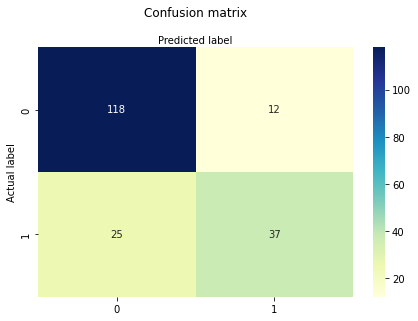

In [147]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [148]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8072916666666666
Precision: 0.7551020408163265
Recall: 0.5967741935483871


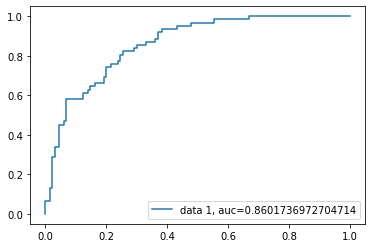

In [151]:
y_pred_proba = model.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [153]:
#Model Score
model_score = model.score(x_test, y_test)

print(model_score)

0.8125
